In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import os 
import subprocess
import time 
import signal 
import threading 

In [13]:
#remove files 
precision_list = [ x for x in range(3,53)]



In [14]:
#get the dat a
original_output = 'clgan.txt'
filename = original_output
data = np.loadtxt(filename, delimiter=';')
origin_energy = data[1:].astype(np.float64)


In [15]:
print(origin_energy)

[ 180.24078135  367.85187517  559.81850792  755.18456613  937.11271076
 1117.08551647 1303.01016184 1484.95464949 1657.20588918 1840.55385611
 2020.79610256 2191.94116785 2348.25621652 2535.33372123 2694.78957528
 2886.34428618 3079.6645629  3278.2543102  3464.91872961 3652.57125132]


In [22]:
agg_err = []


In [23]:
for prec in precision_list: 
    exp_filename = f"RS_cross_exp_prec{prec}.txt"
    exp_data = np.loadtxt(exp_filename, delimiter=';', max_rows= 21)
    exp_origin_energy = exp_data[1:].astype(np.float64)
    print(exp_origin_energy)
#
    agg_err.append((np.sum(np.abs(origin_energy - exp_origin_energy, dtype= np.float64)/np.abs(origin_energy, dtype= np.float64), dtype= np.float64)))
    

[ 211.63816692  409.51313165  600.92126951  783.03861396  986.59130494
 1166.19900641 1367.63019982 1570.48998585 1763.92014241 1943.31872115
 2146.21260327 2350.55155656 2544.46982306 2728.71950291 2934.5707182
 3138.33978909 3371.35013644 3551.89790004 3743.9321405  3942.68499056]
[ 198.51416582  410.86010055  603.25085257  776.3466904   986.23901033
 1200.98752332 1419.7098374  1629.26955467 1827.45863643 2023.42183389
 2239.93775668 2442.16012014 2631.99510685 2822.81250455 3038.58910978
 3254.2478553  3459.47187589 3654.81545618 3878.35946575 4075.53449249]
[ 214.77309105  421.76667928  628.16316721  834.94747667 1035.60010084
 1237.40568402 1439.00349755 1644.14155379 1845.56920264 2061.12749947
 2278.79428954 2474.22758769 2667.0447887  2885.22565383 3095.86422917
 3298.25122189 3503.94970787 3714.92800925 3920.42500241 4123.37988349]
[ 191.02234361  384.37024787  585.00455347  800.11575552  990.80924502
 1196.84370008 1388.78624473 1582.71005    1773.42877029 1957.85499376
 215

In [24]:
print(agg_err)

[1.5306253974059298, 2.0254460066230044, 2.5768311969218236, 1.4192413829608996, 0.5326909594518339, 0.33110206549768684, 0.3418254896428186, 0.4124609000498788, 0.18834005124024403, 0.37340180331986966, 0.22252505643959802, 0.11274019674536052, 0.1931854618936559, 0.16640847534513029, 0.028302949618879147, 0.003578186659423083, 7.890393622028274e-05, 5.843922825786752e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


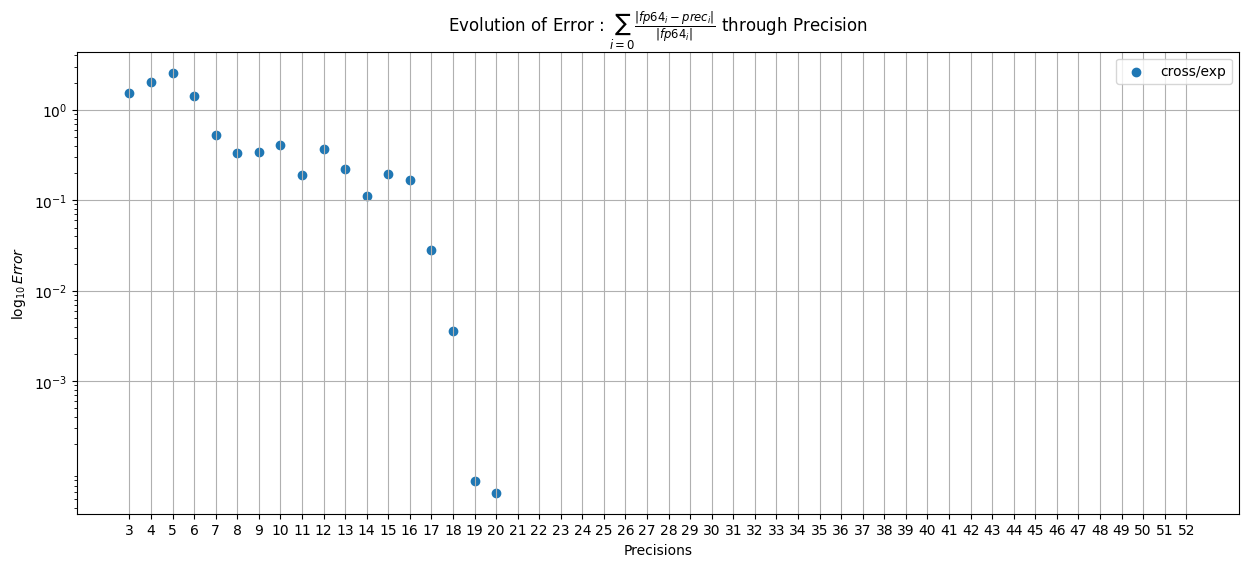

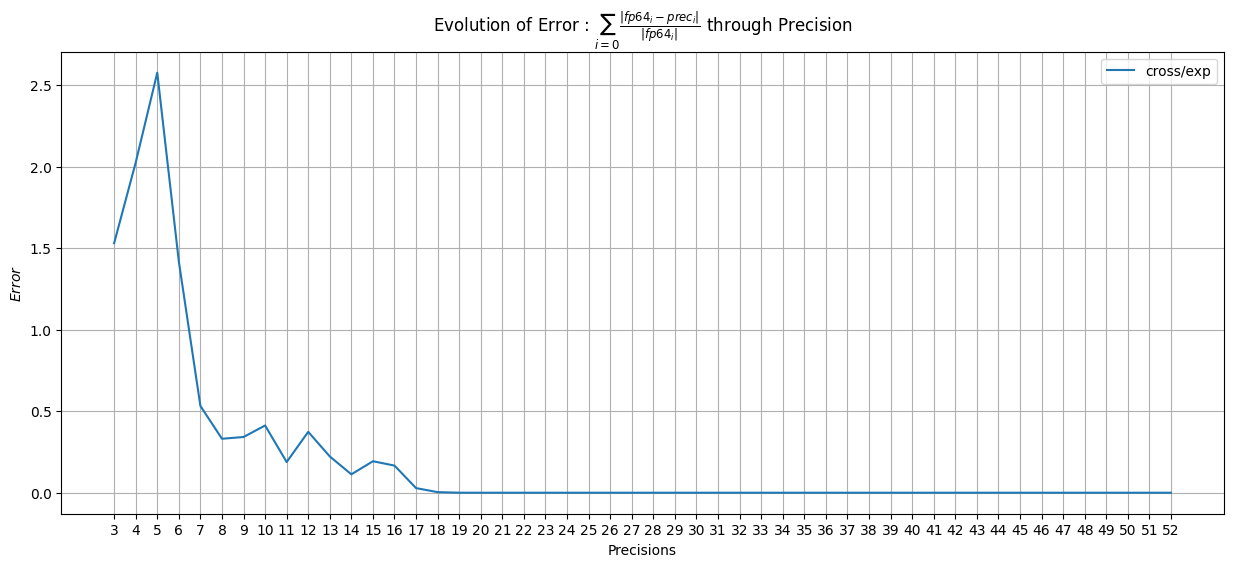

In [42]:
plt.figure(figsize=(15,6))
plt.scatter(precision_list, agg_err, label= 'cross/exp')

plt.xticks(precision_list)
plt.yscale('log')
plt.ylabel(r'$\log_{10}{Error}$')
plt.xlabel('Precisions')
plt.title(r'Evolution of Error : $\sum_{i=0}{\frac{|fp64_i - prec_i|}{|fp64_i|}}$ through Precision')
y_ticks = np.arange(-3,1)
bb= [10.0**x for x in y_ticks]
plt.yticks(bb)
plt.legend()
plt.grid()
plt.savefig('evolution_error_cross_exp_scatter.png')


plt.show()
plt.figure(figsize=(15,6))

plt.plot(precision_list, agg_err, label = 'cross/exp')
plt.xlabel('Precisions')
plt.xticks(precision_list)
plt.title(r'Evolution of Error : $\sum_{i=0}{\frac{|fp64_i - prec_i|}{|fp64_i|}}$ through Precision')
plt.legend()
plt.grid()
plt.ylabel(r'${Error}$')
plt.savefig('evolution_error_cross_exp_plot.png')


plt.show()


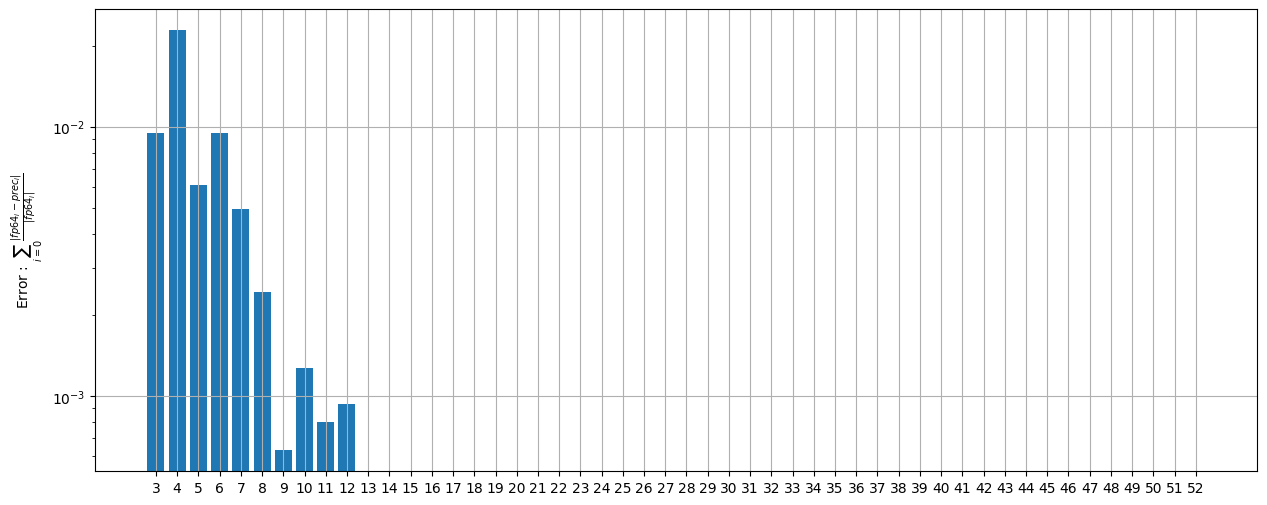

In [43]:
plt.figure(figsize=(15,6))
plt.bar(precision_list, agg_err)
plt.xticks(precision_list)
plt.yscale('log')
plt.ylabel(r'Error : $\sum_{i=0}{\frac{|fp64_i - prec_i|}{|fp64_i|}}$')
plt.grid()
plt.ylabel('Precisions')
plt.show()